In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargar el conjunto de datos MNIST
mnist = keras.datasets.mnist

# Cargue la división de entrenamiento y prueba del conjunto de datos MNIST
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Normalizar los valores de pixeles del tren y probar las imágenes
training_images = training_images / 255.0
test_images = test_images / 255.0

In [4]:
# Construir el modelo de clasificación
model = keras.models.Sequential([
    # Agregar convoluciones y max pooling
    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2, 2),
    # Agregar las mismas capas que antes
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [5]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
1875/1875 [==============================] - 45s 23ms/step - loss: 0.1403 - accuracy: 0.9586
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0497 - accuracy: 0.9847
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0306 - accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0199 - accuracy: 0.9936
Epoch 5/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0134 - accuracy: 0.9957
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0088 - accuracy: 0.9971
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0085 - accuracy: 0.9969
Epoch 8/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0049 - accuracy: 0.9984
Epoch 9/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0055 - accuracy: 0.9982
Epoch 10/10
1875/1875 [==============================] - 41s 22m

<Axes: >

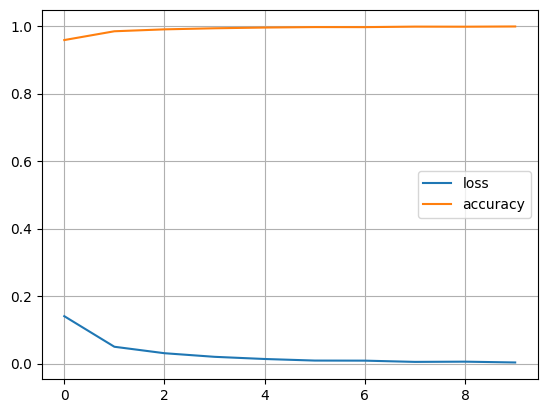

In [6]:
# Entrenar el modelo
history = model.fit(training_images, training_labels, epochs=10)

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)

In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

In [ ]:
# predict
index = 1
print(f'Label:{test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Clssification:\n {classification.reshape(-1,1)}')

In [ ]:
print(test_labels[:30])

In [ ]:
FIRST_IMAGE=3
SECOND_IMAGE=10
THIRD_IMAGE=25

print(test_labels[FIRST_IMAGE])
print(test_labels[SECOND_IMAGE])
print(test_labels[THIRD_IMAGE])

In [ ]:
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[0].imshow(test_images[SECOND_IMAGE])
axarr[0].imshow(test_images[THIRD_IMAGE])

In [ ]:
layer = 0
filter1 = 0
filter2 = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(input=model.input, outputs = layer_outputs)

In [ ]:
f, axarr = plt.subplot(3,3)

axarr[0,0].set_title("Imagen Input")
axarr[0,0].imshow(test_images[FIRST_IMAGE])
f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[0,1].set_title("Layer"+str(layer)+", Filter1")
axarr[0,1].imshow(f1[0, :, :, filter1])
axarr[0,2].set_title("Layer"+str(layer)+", Filter2")
axarr[0,2].imshow(f1[0, :, :, filter2])

axarr[0,0].imshow(test_images[SECOND_IMAGE])
f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[1,1].imshow(f2[0, :, :, filter1])
axarr[1,2].imshow(f2[0, :, :, filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE])
f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[2,1].imshow(f3[0, :, :, filter1])
axarr[2,2].imshow(f3[0, :, :, filter2])

In [ ]:
FISRT_IMAGE = 2
SECOND_IMAGE = 5
THIRD_IMAGE= 14